In [17]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch

In [18]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Model running via: {device}")

# Synthetic Data points
total_points_dataset = 30
complexity_range = 1

# Model Parameters
num_epochs = 3000
input_dim = 1
output_dim = 1
hidden_dims = ([100, 100, 100, 100, 100, 100, 100])
embedding_dim = 0


def F(y):
    zeros = torch.zeros_like(y)
    half = torch.ones_like(y) * 0.5
    y_0 = torch.where(y <= half, 0.5 * (6 * y - 2)**2 * torch.sin(12 * y - 4) + 10 * (y - 0.5), zeros)
    y_1 = torch.where(half < y, 3 + 0.5 * (6 * y - 2)**2 * torch.sin(12 * y - 4) + 10 * (y - 0.5), y_0)
    return y_1

# Random ranged data array for synthetic data
Z = torch.linspace(0, complexity_range, 1000)[:,None]

# Model's total training/val/testing dataset
X = torch.linspace(0, complexity_range, total_points_dataset, dtype=torch.float32)[:,None]

# Splitting the dataset
Placeholder, X_test, Place_holder, Y_test = train_test_split(X, F(X), test_size=0.8)

X_train = torch.linspace(0, complexity_range, total_points_dataset)[:,None] # .long()
Y_train = F(X_train)


# Model Hyperparameters Initialisation
num_epochs = 1000 # Number of epochs to run
hidden_dims = ([100, 100, 100, 100, 100, 100, 100]) # Number of neurons per hidden layer

# Model Structure Initialisation
class Network(torch.nn.Module): # NN Class
  def __init__(self, hidden_dims, input_dim, output_dim): # NN layer initialisation (number of input, output and hidden layers are set)
    super().__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dims[0])
    self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
    self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
    self.fc4 = nn.Linear(hidden_dims[2], hidden_dims[3])
    self.fc5 = nn.Linear(hidden_dims[3], hidden_dims[4])
    self.fc6 = nn.Linear(hidden_dims[4], hidden_dims[5])
    self.fc7 = nn.Linear(hidden_dims[5], hidden_dims[6])
    self.fc8 = nn.Linear(hidden_dims[6], output_dim)

  def forward(self, x): # NN activation function initialisation (ReLu in this case)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = torch.relu(self.fc5(x))
    x = torch.relu(self.fc6(x))
    x = torch.relu(self.fc7(x))
    x = self.fc8(x)
    return x

model = Network(hidden_dims, input_dim, output_dim).to(device) # Model ready to be trained 

for param in model.parameters():
    param.requires_grad = True # "True" indicates that the model's gradients will be computed and updated during training 

Model running via: cuda


In [20]:
# Training Loop
criterion = torch.nn.MSELoss().to(device) # Loss Criterion (Mean Squared Error in this case)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0) # Adam optimiser with its learning rate set to 0.0001

for epoch in range(num_epochs): # Sets a loop for each epoch

    y_pred = model(X_train.to(device)) # Initiates forward pass by running X_input through the model
    loss = criterion(y_pred, Y_train.to(device)) # Computes loss between the prediction of the model and target Y_train data with the criterion 
    optimizer.zero_grad() # Sets gradients of the parameters to zero before each epoch is run to avoid mixing of gradients between runs
    loss.backward() # Initiates backward pass and calculates gradients of the loss respect to all parameters in the network
    optimizer.step() # Updates the parameters of the model using the gradients using the optimizer

 Number of Epochs needed (out of 3000): 3000
 Training Loss of Model: 0.0012275832705199718


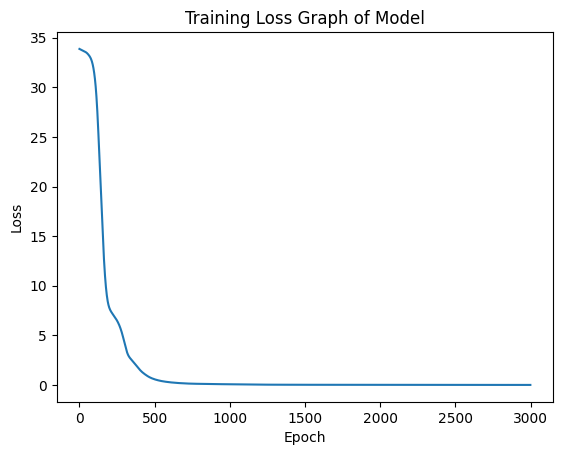

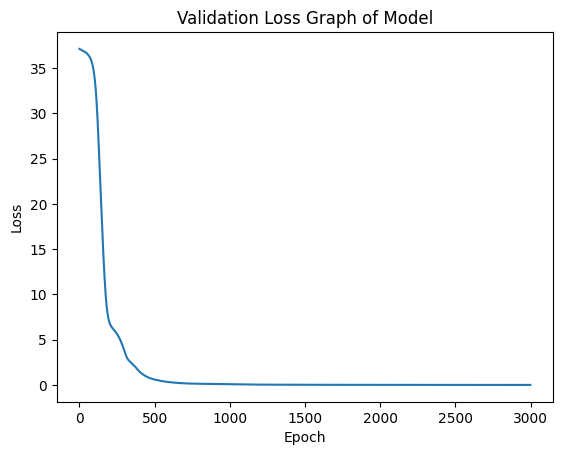

In [21]:
# # Evaluating the network on the validation set 
# model.eval() # Set the model to evaluation mode # ONLY FOR TESTING NOT EVALING

# with torch.no_grad():

print(f" Number of Epochs needed (out of {num_epochs}): {len(losses)}")
print(f" Training Loss of Model: {loss}")
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Graph of Model')
plt.show()

plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Graph of Model')
plt.show()

Error: 7.067656781087367


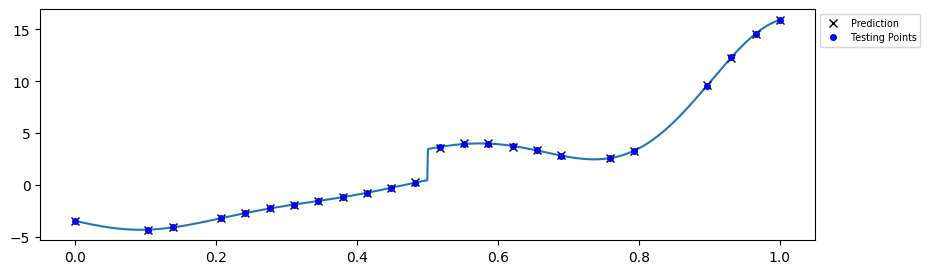

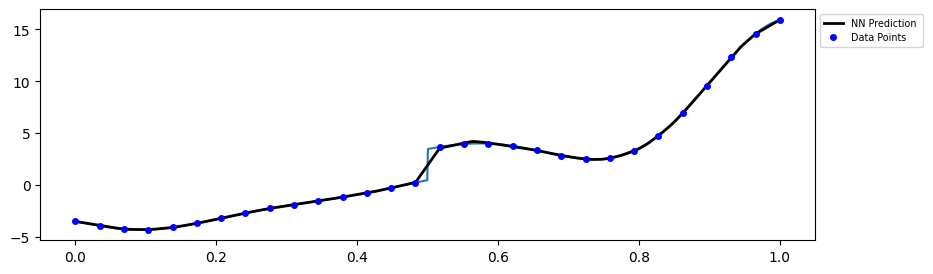

In [22]:
with torch.no_grad():
    Y_test_prediction = model(X_test.to(device)) # Testing Data
    y_pred_new = model(Z.to(device)) # Define the NEW input data

percentage_errors = []

for i in range(len(losses)):
    abs_error = ((abs(losses[i] - val_losses[i]))/2)
    percentage_error = (abs_error / val_losses[i]) * 100
    percentage_errors.append(percentage_error)
    
average_percentage_error = sum(percentage_errors) / len(percentage_errors)
print(f"Error: {average_percentage_error}")

# Testing Data
plt.figure(figsize=(10,3))
plt.plot(Z, F(Z)) 
plt.plot(X_test.cpu().detach().numpy(), Y_test_prediction.cpu().detach().numpy(), "kx", label='Prediction')
plt.plot(X_test.cpu().detach().numpy(), Y_test.cpu().detach().numpy(),"bo", markersize = 4, label='Testing Points')
# plt.plot(X_test.cpu().detach().numpy(), Y_test_prediction.cpu().detach().numpy(),'x', lw=2, label= "NN Prediction ")
# plt.plot(X_test.cpu().detach().numpy(), Y_test.cpu().detach().numpy(), 'bo', markersize = 4, label = 'Data Points')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='x-small')
plt.show()


# Define the NEW input datax
plt.figure(figsize=(10,3))
plt.plot(Z, F(Z)) 
plt.plot(Z.cpu().detach().numpy(), y_pred_new.cpu().detach().numpy(),'k', lw=2, label= "NN Prediction ")
plt.plot(X_train.cpu().detach().numpy(), Y_train.cpu().detach().numpy(), 'bo', markersize = 4, label = 'Data Points')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='x-small')
plt.show()